<a href="https://colab.research.google.com/github/abduqodir-pulatov/class_works/blob/main/vazifa_anomally_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
from sklearn.datasets import fetch_kddcup99
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


In [92]:
data = fetch_kddcup99(subset='SA', percent10=True, as_frame=True)
X = data.data.copy()
y = data.target.copy()

In [93]:
y_bin = y.apply(lambda x: 1 if x == b'normal.' else -1)

In [95]:
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].apply(lambda val: val.decode('utf-8') if isinstance(val, bytes) else val)
    X[col] = LabelEncoder().fit_transform(X[col])

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

In [98]:
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_train)

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 5

IsolationForest(contamination=0.1, random_state=42)

In [100]:
y_pred = model.predict(X_test)

In [101]:
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[  321   329]
 [ 1648 17833]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.16      0.49      0.25       650
           1       0.98      0.92      0.95     19481

    accuracy                           0.90     20131
   macro avg       0.57      0.70      0.60     20131
weighted avg       0.96      0.90      0.92     20131

0.9017932541850877


ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


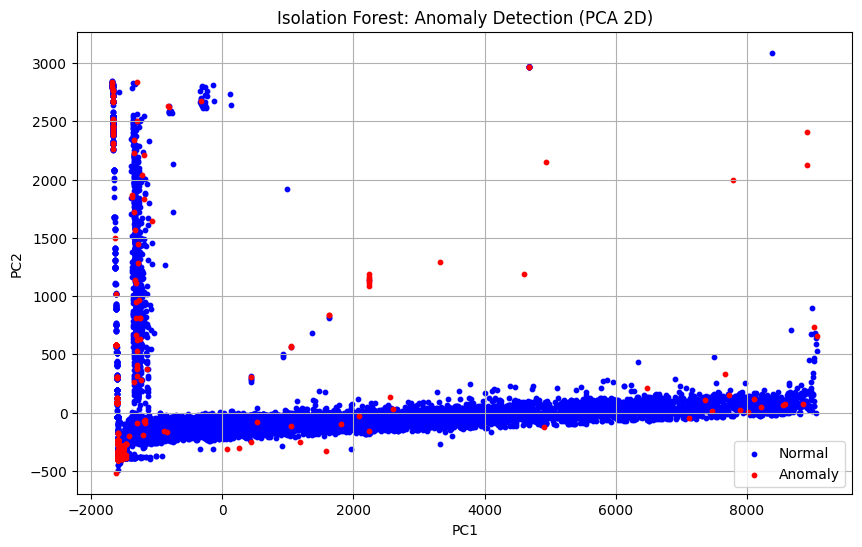

In [102]:
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

plt.figure(figsize=(10,6))
plt.scatter(X_test_2d[y_pred == 1][:, 0], X_test_2d[y_pred == 1][:, 1],
            c='blue', label='Normal', s=10)
plt.scatter(X_test_2d[y_pred == -1][:, 0], X_test_2d[y_pred == -1][:, 1],
            c='red', label='Anomaly', s=10)
plt.title('Isolation Forest: Anomaly Detection (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
!pip install pyngrok python-telegram-bot --quiet
from pyngrok import ngrok

# Ngrok tokenni o'rnatish (faqat bir marta)
!ngrok config add-authtoken 2ym7gzqIXm20GrjThRMcsEFeCty_ZVZLSJnNw2HERMaZovx5

# Flask yoki HTTP serverni ochish uchun tunnel
public_url = ngrok.connect(8443)
print("Webhook URL:", public_url)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.3/702.3 kB 7.5 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Webhook URL: NgrokTunnel: "https://a120-35-236-173-144.ngrok-free.app" -> "http://localhost:8443"


In [65]:
from telegram import Bot
bot = Bot("7422854655:AAGk357TqdRTIPs36_dfM06AcCSFpXmZbVw")
bot.set_webhook(url=f"{public_url}/webhook")

<coroutine object Bot.set_webhook at 0x7edf7fa55a60>

In [69]:
from flask import Flask, request
from telegram.ext import CommandHandler, MessageHandler, filters, Application
import asyncio
import telegram

app = Flask(__name__)

application = Application.builder().token("7422854655:AAGk357TqdRTIPs36_dfM06AcCSFpXmZbVw").build()

@app.route('/webhook', methods=['POST'])
def webhook():
    update = telegram.Update.de_json(request.get_json(force=True), application.bot)
    application.process_update(update)
    return 'ok'

@app.route('/')
def index():
    return "Bot ishlayapti"